<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
if not os.path.exists('moore.csv'):
    r = requests.get('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv')
    with open('moore.csv', 'wb') as f:
        f.write(r.content)

data = pd.read_csv('moore.csv').values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

X = X - X.mean()
y = np.log(y)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 483.2463
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 459.3450
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 263.4620
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 230.1722
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 189.0392
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 191.1755
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 153.3064
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 93.6958
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 63.3927
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 40.1264
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 24.8857
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 26.4710
Epoch 13/200
6/6 [========================

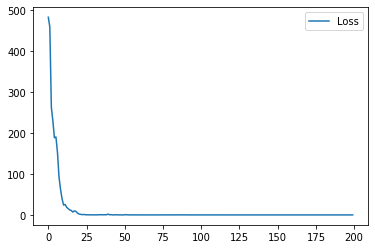

Time to double: 2.0215488371819887


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 2.0215488371819887


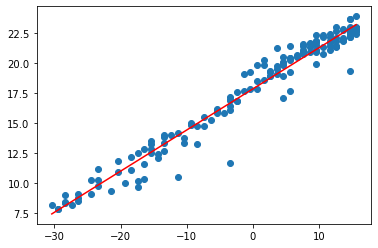

In [ ]:
a = model.layers[0].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y)
plt.plot(X_hat, y_hat, color='red')
plt.show()